*1007 파이썬 머신러닝 완벽 가이드 p.244~p.267,* *p.295~p.306*

*(ch4. 7~8, 11)*

# **CHAPTER 04. 분류**



> # **07. LightGBM**

LightGBM의 장점: XGBoost보다 학습에 걸리는 시간이 훨씬 적고, 메모리
사용량도 상대적으로 적음. 카테고리형 피처의 자동 변환과 최적 분할

LightGBM의 단점: 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움.

- 리프 중심 트리 분할(Leaf Wise): 트리의 균형을 맞추지 않고, 최대
손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리 생성 -> 예측 오류 손실을 최소화

<center>
<img src='https://drive.google.com/uc?id=14XuI---T43GWQPtOhF6juUdiZU6lZ_qE'
>

**[ LightGBM 설치 ]**



In [2]:
pip install lightgbm==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [3]:
import lightgbm
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**[ LightGBM 하이퍼 파라미터 ]**

### <주요 파라미터>

- num_iterations [ default = 100 ]: 반복 수행하려는 트리의 개수를 지정.
- learning_rate [ default = 0.1 ]: 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. (LightGBM의 사이킷런 호환 클래스에서는 n_estimators로 이름이 변경
)
- max_depth [ defalt=—1 ]: 트리 기반 알고리즘의 max_depth와 같음. 0보다 작은 값을 지정하면 깊이에 제한 없음.
- min_data_in_leaf [ default = 20 ]: 결정 트리의 min_samples_leaf와 같은 파라미터. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. (LightGBMCIassifier에서는 min_child_samples 파라미터로 변경)
- num_leaves [ default = 31 ]: 하나의 트리가 가질 수 있는 최대 리프 개수.
- boosting [ default = gbdt ]: 부스팅의 트리를 생성하는 알고리즘을 기술
    -  gbdt: 일반적인 그래디언트 부스팅 결정 트리
    -  rf: 랜덤 포레스트
- bagging_fraction [ default = 1.0 ]: 데이터를 샘플링하는 비율. (LightGBMCIassifier에서는 subsample로 동일하게 파라미터 이름이 변경.)
- feature_fraction [ default = 1.0 ]: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. LightGBM Classifier에서는 동일하게 colsample_bytree로 변경됨.
- lambda_l2 [default=0.0 ]: L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과. (LightGBMCIassifier에서는 regjambda로 변경)
- Iambda_l1 [ default = 0.0 ]: L1 regulation 제어를 위한 값. L2와 마찬가지로 과적합 제어를 위한 것. (LightGBMCIassifier에서는 reg_alpha로 변경)

---

### <Learning Task 파라미터>

- objective: 최솟값을 가져야 할 손실함수를 정의. Xgboost의 objective 파라미터와 동일. 애플리케이션 유형 (회귀, 다중 클래스 분류, 이진 분류인지)에 따라서 objective인 손실함수가 지정됨.

**[ 하이퍼 파라미터 튜닝 방안]**

 기본 튜닝 방안: num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것

- num_leaves(개별 트리가 가질 수 있는 최대 리프의 개수): 일반적으로 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐.
- min_data_in_leaf: 큰 값으로 설정하면 트리가 깊어지는 것을 방지함.
- max_depth(명시적으로 깊이의 크기를 제한): num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용함.

-ex. learning_rate를 작게 하면서 n_estimators를 크게! (n_estimators를 너무 크게 하는 것은 과적합될 수 있음)

---

-이 외에 reg_lambda, reg_alpha와 같은 regularization을 적용하거나,

-학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있음

**[ 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교 ]**


<center>
<img src='https://drive.google.com/uc?id=1riWBOkpQ4Yqtcz9135FQ9wiA8L6vB5NN'
>



**[ LightGBM 적용 - 위스콘신 유방암 예측 ]**



In [4]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, eval_metric="logloss", eval_set=evals, callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=1)])
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1:0.9677, AUC:0.9877


=> 정확도가 약 95.61%

LihtGBM 파이썬 패키지인 lightgbm은 XGBoost 파이썬 패키지인 xgboost와 동일하게 피처 중요도를 시각화할 수 있는 내장 API를 제공. 이름도 동일하게 plot_importance(), 사이킷런 래퍼 클래스를 입력해도 시각화를 제공.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

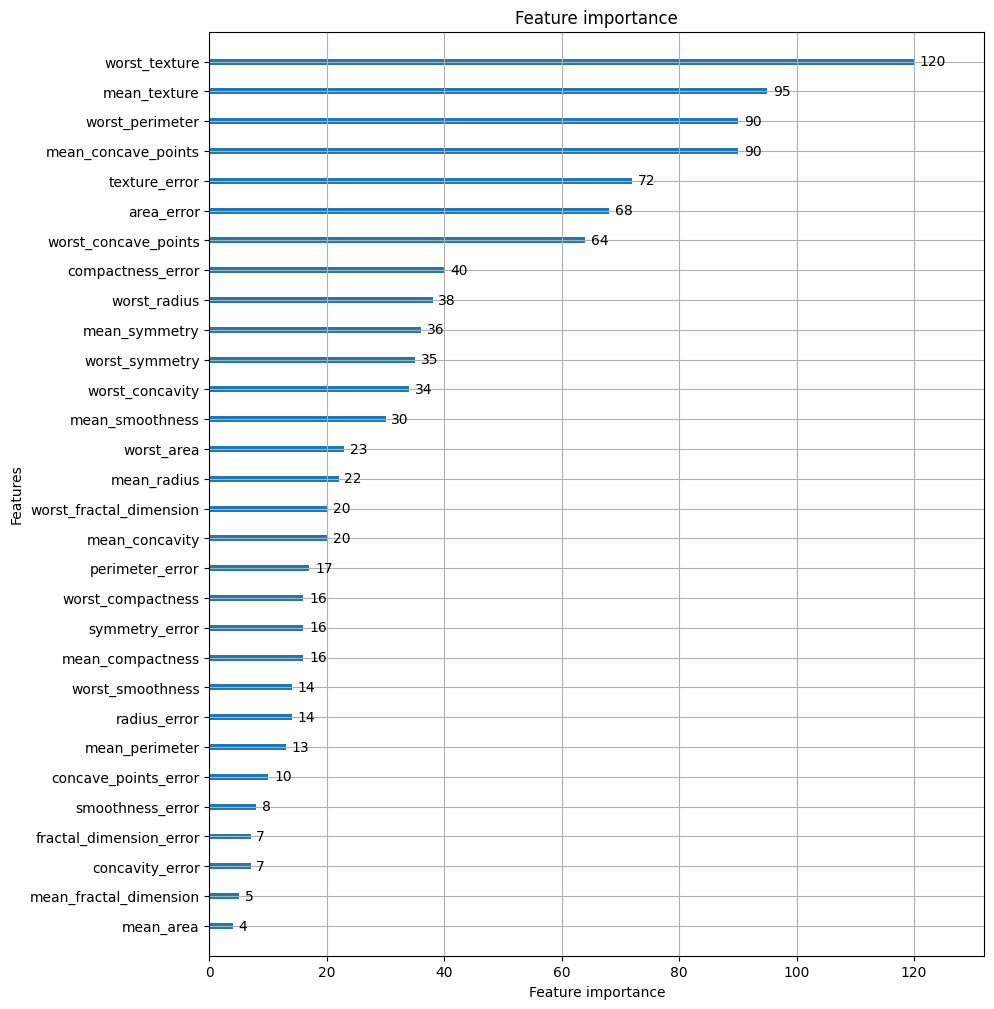

In [6]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)



> # **08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**



<XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시>

Grid Search 방식: 최적 하이퍼 파라미터를 찾으려면 많은 시간이 소모!

-> 베이지안 최적화 기법 사용

---

**[ 베이지안 최적화 개요 ]**

베이지안 최적화: 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 <가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식>

- 베이지안 확률에 기반->베이지안 확률이 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나가듯이, 베이지안 최적화는 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 냄.

---

<베이지안 최적화를 구성하는 두 가지 중요 요소>

- 대체 모델(Surrogate Model): 획득 함수로부터 최적 함수를 예측할 수 있는 입력값(하이퍼 파라미터)을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나감

- 획득 함수(Acquisition Function): 개선된 대체 모델을 기반으로 최적 입력값을 계산함.

---

<베이지안 최적화의 단계>

<center>
<img src='https://drive.google.com/uc?id=1Qs6Q8vh8W56pTBbkY9j_ZCO6vG8A3NCx'
 width="500">

<center>
<img src='https://drive.google.com/uc?id=1q5ixeNqaJ6vvOG8QrKRSivkG39nn3RJS'
 width="500">

<center>
<img src='https://drive.google.com/uc?id=1aOE56movOZxVJBehPNseCwSjHXDL31Og'
 width="500">



**[ HyperOpt 사용하기 ]**

대표적인 베이지안 최적화를 위한 파이썬 패키지: HyperOpt, Bayesian Optimization, Optuna 등등등...



In [7]:
pip install hyperopt

- 첫째로 입력 변수명과 입력값의 검색 공간(Search Space) 설정
- 둘째로 목적 함수(Objective Function)의 설정
- 마지막으로 목적 함수의 반환 최솟값을 가지는 최적 입력값을 유추

In [8]:
from hyperopt import hp

# -10 ~ 10까지 1 간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

<입력값의 검색 공간을 제공하는 대표적인 함수들>

- hp.quniform(label, low, high, q): label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을
가지고 설정.

- hp.uniform(label, low, high): 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정

- hp.randint(label, upper): 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.

- hp.loguniform(label, low, high): exp(uniform(low, high))값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정.
- hp.choice(label, options): 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion', ['gini', 'entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함.

*딕셔너리 형태로 반환할 경우 -> {'loss'： retval, 'status':STATUS_OK} 와 깉이 loss와 status 키 값을 설정해서 반환해야함.

In [9]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

*HyperOpt는 최적의 입력값을 찾기 위해 fmin(objective, space, algo, max_evals, trials) 함수를 제공함.

<fmin() 함수의 주요 인자>

- fn: 목적 함수
- space: 검색 공간 딕셔너리
- algo: 베이지안 최적화 적용 알고리즘(기본적으로 tpe.suggest)
- max_evals: 최적 입력값을 찾기 위한 입력값 시도 횟수
- trials: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용.
- rstate: fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드(seed) 값

In [10]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|██████████| 5/5 [00:00<00:00, 145.82trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [15]:
trial_val = Trials()
# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 256.70trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


=> 그리드 서치와 같이 순차적으로 x, y 변숫값을 입력해서 최소 함수 반환값을 찾는다면 최대 21*31=651회의 반복이 필요할 수도 있는데 반해서,
베이지안 최적화를 이용해서는 20회의 반복만으로 일정 수준의 최적값을 근사해 낼 수 있음.

---

<Trials 객체의 중요 속성>

: results(함수의 반복 수행 시마다 반환되는 반환값)와 vals(함수의 반복 수행 시마다 입력되는 입력 변숫값)

In [16]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss'：함수 반환값, ‘status'：반환 상태값}와 같은 딕셔너리임.

print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [17]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


=> results와 vals 속성: 함수 반환값과 입력 변숫값들의 정보를 제공.

In [18]:
import pandas as pd
# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]
# DataFrame으로 생성 .
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses' : losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


=> 생성된 DataFrame을 통해 좀 더 직관적으로 수행 횟수별 입력 변수 x, y와 반환값 loss를 확인.

---

**[ HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화 ]**

In [19]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [20]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01 에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                    }

In [21]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}

In [22]:
# fmin()을 이용해 최적 하이퍼 파라미터를 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:47<00:00,  1.05trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5026505409854508, 'learning_rate': 0.19828428817109603, 'max_depth': 15.0, 'min_child_weight': 1.0}


=> best 출력 결과: colsample_bytree=2 0.54241, learning_rate=0.12601, max_depth=17.0, min_child_weight=2.0

*정수형 하이퍼 파라미터인 max_depth, min_child_weight가 실수형 값으로 도출되었음

In [23]:
# fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력하기 전에
# 정수형 하이퍼 파라미터는 정수형으로 형 변환을, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환

print('cosample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'], 5),round(best['learning_rate'], 5),int(best['max_depth']),int(best['min_child_weight'])))

cosample_bytree:0.50265, learning_rate:0.19828, max_depth:15, min_child_weight:1


In [26]:
# 도출된 최적 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습
# XGBoost의 조기 중단을 검증 데이터 세트로 활용하며 n_estimators는 400으로 증가.

xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5),
                            eval_metric='logloss',
                            early_stopping_rounds=50,
                            verbose=True
)

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals)
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.51230	validation_1-logloss:0.55948
[1]	validation_0-logloss:0.40697	validation_1-logloss:0.47575
[2]	validation_0-logloss:0.32809	validation_1-logloss:0.41760
[3]	validation_0-logloss:0.27049	validation_1-logloss:0.37988
[4]	validation_0-logloss:0.22671	validation_1-logloss:0.34438
[5]	validation_0-logloss:0.19305	validation_1-logloss:0.31788
[6]	validation_0-logloss:0.16589	validation_1-logloss:0.30717


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-logloss:0.14300	validation_1-logloss:0.30056
[8]	validation_0-logloss:0.12355	validation_1-logloss:0.29707
[9]	validation_0-logloss:0.10737	validation_1-logloss:0.28298
[10]	validation_0-logloss:0.09355	validation_1-logloss:0.26801
[11]	validation_0-logloss:0.08250	validation_1-logloss:0.26738
[12]	validation_0-logloss:0.07357	validation_1-logloss:0.26220
[13]	validation_0-logloss:0.06572	validation_1-logloss:0.26240
[14]	validation_0-logloss:0.05892	validation_1-logloss:0.25570
[15]	validation_0-logloss:0.05247	validation_1-logloss:0.25186
[16]	validation_0-logloss:0.04804	validation_1-logloss:0.24924
[17]	validation_0-logloss:0.04336	validation_1-logloss:0.24016
[18]	validation_0-logloss:0.03953	validation_1-logloss:0.23794
[19]	validation_0-logloss:0.03585	validation_1-logloss:0.23625
[20]	validation_0-logloss:0.03349	validation_1-logloss:0.24089
[21]	validation_0-logloss:0.03109	validation_1-logloss:0.24096
[22]	validation_0-logloss:0.02906	validation_1-logloss:0.2

=> 정확도가 약 0.96474로 도출



---


p.295~p.306



> **11. 스태킹 앙상블**

- 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행.
- 메타 모델: 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식

스태킹 모델 개념의 간단한 다이어그램: 여러 개의 모델에 대한
예측값을 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행
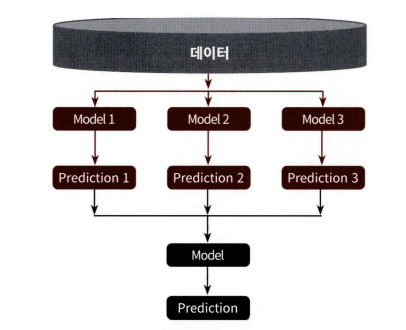

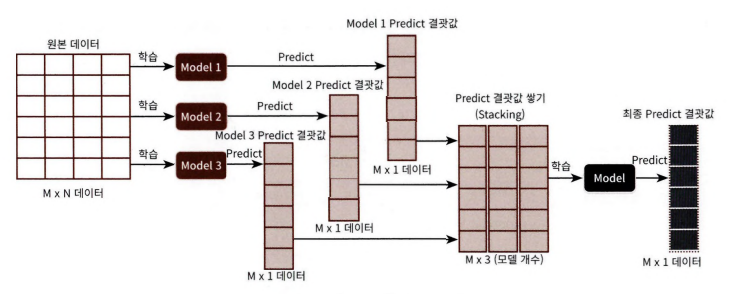

**[ 기본 스태킹 모델 ]**

In [29]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [30]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression() # 로지스틱 회귀 모델

In [31]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [32]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [33]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [39]:
# 최종 메타 모델인 로지스틱 회귀를 학습, 예측 정확도 측정

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


=> 정확도가 97.37%로 개별 모델 정확도보다 향상

---

**[ CV 세트 기반의 스태킹 ]**

- 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 **학습용 스태킹 데이터** 생성과 예측을 위한 **테스트용 스태킹 데이터**를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측

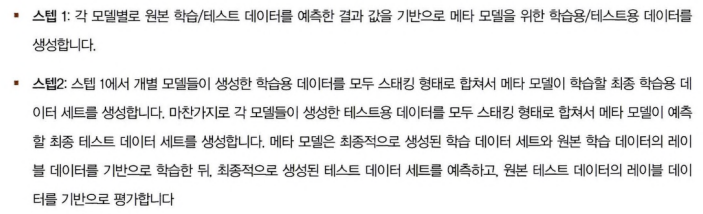

1. 학습용 데이터를 N개의 폴드(Fold)로 나눔(여기서는 3개의 폴드세트로 가정)
3개의 폴드세트이므로 3번의 유사한 반복 작업을 수행하고, 마지막 3번째 반복에서 개별 모델의 예측 값으로 학습 데이터와 테스트 데이터를 생성

2. 각 모델들이 스텝 1로 생성한 학습과 테스트 데이터를 모두 합쳐서 최종적으로 메타 모델이 사용할 학습 데이터와 테스트 데이터를 생성

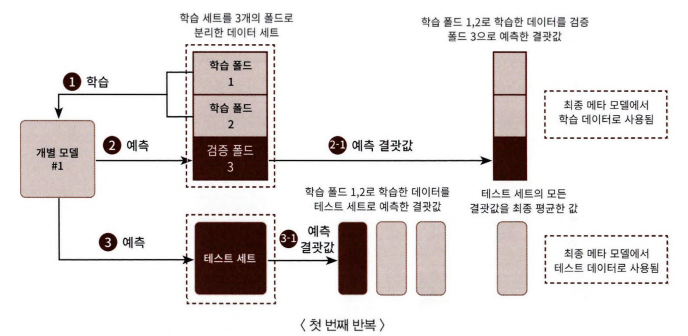

*검증 폴드를 3,2,1로 옮겨 총 3번 시행

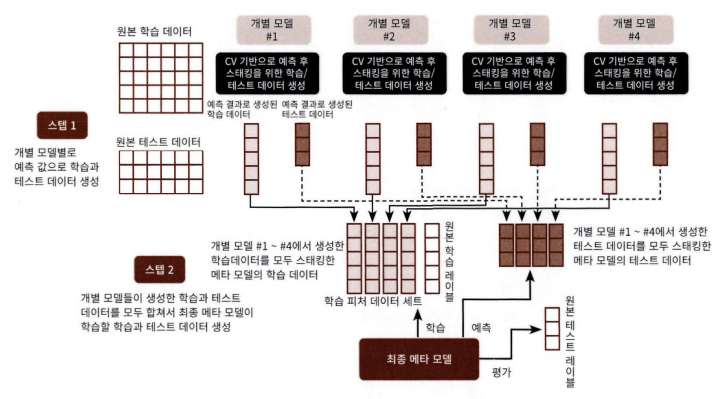

<스텝 1>

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__,'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [41]:
# 여러 개의 분류 모델별로 stack_base_model() 함수를 수행
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


<스텝 2>

In [43]:
Stack_final_X_train =np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피터 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피터 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


Stack_final_X_train: 메타 모델이 학습할 학습용 피처 데이터 세트

Stack_final_X_test: 메타 모델이 예측할 테스트용 피처 데이터 세트

In [45]:
lr_final.fit(Stack_final_X_train, y_train) #스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습
stack_final = lr_final.predict(Stack_final_X_test) #스태킹된 테스트 데이터 세트로 예측
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))
#예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도 측정

최종 메타 모델의 예측 정확도: 0.9825




> **12. 정리**


- 대부분의 앙상블 기법: 결정 트리 기반의 다수의 약한 학습기(Weak Learner)를 결합해 변동성을 줄여 예측 오류를 줄이고 성능을 개선.

- 결정 트리 알고리즘: 정보의 균일도에 기반한 규칙 트리를 만들어서 예측 수행.
    * 장점: 다른 알고리즘에 비해 비교적 직관적이어서 어떻게 예측 결과가 도출되었는지 그 과정을 쉽게 알 수 있음.
    * 단점: 균일한 최종 예측 결과를 도출하기 위해 결정 트리가 깊어지고 복잡해지면서 과적합이 쉽게 발생.

- 앙상블 기법 - 배깅, 부스팅
    * 배깅 방식: 학습 데이터를 중복을 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합해 예측. (랜덤 포레스트)
    * 부스팅: 학습기들이 순차적으로 학습을 진행하면서 예측이 틀린 데이터에 대해서는 가중치를 부여해 점점 높은 정확도로 예측. GBM(Gradient Boosting Machine)은 뛰어난 예측 성능을 가졌지만, 수행 시간이 너무 오래 걸림.


- XGBoost와 LightGBM: 사이킷런 래퍼 클래스를 이용하면 사이킷런의 여타 다른 Estimator 클래스와 동일한 방식으로 사이킷런 기반의 머신러닝 애플리케이션을 더 쉽게 개발할 수 있음.

- 스태킹 모델: 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법